### Statistical Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy import stats

In [2]:
df_suicide = pd.read_csv('./data/df_suicide.csv')
print(df_suicide.shape)
df_suicide.head(20)

(14080, 11)


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,region
0,Albania,2002,male,75+ years,4,31007,12.90,"4,435,078,648",1573,Silent,Europe
1,Albania,2002,male,25-34 years,23,206286,11.15,"4,435,078,648",1573,Generation X,Europe
2,Albania,2002,male,35-54 years,35,382139,9.16,"4,435,078,648",1573,Boomers,Europe
3,Albania,2002,male,55-74 years,13,198130,6.56,"4,435,078,648",1573,Silent,Europe
4,Albania,2002,male,15-24 years,15,263067,5.70,"4,435,078,648",1573,Millenials,Europe
5,Albania,2002,female,15-24 years,14,275970,5.07,"4,435,078,648",1573,Millenials,Europe
6,Albania,2002,female,35-54 years,15,375113,4.00,"4,435,078,648",1573,Boomers,Europe
7,Albania,2002,female,25-34 years,7,223685,3.13,"4,435,078,648",1573,Generation X,Europe
8,Albania,2002,female,75+ years,1,47407,2.11,"4,435,078,648",1573,Silent,Europe
9,Albania,2002,female,55-74 years,4,191712,2.09,"4,435,078,648",1573,Silent,Europe


In [16]:
df_conflicts = pd.read_csv('./data/df_conflicts.csv')
print(df_conflicts.shape)
df_conflicts.head(20)

(179576, 8)


,year,country,region,deaths_a,deaths_b,deaths_civilians,deaths_unknown,total_deaths
0,2017,Afghanistan,Asia,0,4,0,2,6
1,2002,Afghanistan,Asia,0,0,30,0,30
2,2003,Afghanistan,Asia,1,18,0,0,19
3,2003,Afghanistan,Asia,0,3,0,0,3
4,2003,Afghanistan,Asia,0,0,0,0,0
5,2003,Afghanistan,Asia,0,1,0,0,1
6,2003,Afghanistan,Asia,0,0,0,0,0
7,2003,Afghanistan,Asia,0,1,0,0,1
8,2003,Afghanistan,Asia,0,0,6,2,8
9,2006,Afghanistan,Asia,2,2,0,0,4


### Two Samples Hypothesis Testing 1

* H0: Average deaths in conflicts in Europe in the 21st century = Average deaths by suicide in Europe in the 21st century
* H1: Average deaths in conflicts in Europe in the 21st century != Average deaths by suicide in Europe in the 21st century

In [4]:
# Sorting data 
df_suicide_europe = df_suicide[df_suicide.region.isin(['Europe'])]
df_conflicts_europe = df_conflicts[df_conflicts.region.isin(['Europe'])]
suicide_europe = df_suicide_europe['suicides_no']
conflicts_europe = df_conflicts_europe['total_deaths']


# Calculation the mean
suicide_mean = np.mean(suicide_europe)
conflicts_mean = np.mean(conflicts_europe)
print('deaths by suicide mean value:', suicide_mean)
print('deaths in conflict mean value:', conflicts_mean)


# Calculation the standard deviation
suicide_std = np.std(suicide_europe)
conflicts_std = np.std(conflicts_europe)
print('deaths by suicide std value:', suicide_std)
print('deaths in conflict std value:', conflicts_std)


# T-test
ttest,pval = ttest_ind(suicide_europe, conflicts_europe, equal_var=False)
print('p-value',pval)

if pval <0.05:
    print('we reject null hypothesis')
else:
    print('we accept null hypothesis')

deaths by suicide mean value: 250.81132989025178
deaths in conflict mean value: 3.7408925318761383
deaths by suicide std value: 879.0226296748074
deaths in conflict std value: 18.503538871028333
p-value 2.2000907009093023e-104
we reject null hypothesis


### Two Samples Hypothesis Testing 2

* H0: Average deaths by suicide of men (Europe 21st century) = Average deaths by suicide of women (Europe 21st century)
* H1: Average deaths by suicide of men (Europe 21st century) > Average deaths by suicide of women (Europe 21st century)

In [5]:
# Sorting data 
df_suicide_women = df_suicide_europe[df_suicide_europe.sex.isin(['female'])]
df_suicide_men =  df_suicide_europe[df_suicide_europe.sex.isin(['male'])]  
suicide_women = df_suicide_women['suicides_no']
suicide_men = df_suicide_men['suicides_no']


# Calculation the mean
women_mean = np.mean(suicide_women)
men_mean = np.mean(suicide_men)
print('deaths by suicide women mean value:', women_mean)
print('deaths by suicide men mean value:', men_mean )


# Calculation the standard deviation
women_std = np.std(suicide_women)
men_std = np.std(suicide_men)
print('deaths by suicide women std value:', women_std)
print('deaths by suicide std men value:', men_std)


# T-test (h1 = suicide men greater than woman)
ttest,pval = stats.ttest_ind(suicide_men, suicide_women, equal_var=False)
print('p-value', pval)
print('ttest', ttest)
alpha = 0.05

if (ttest > 0) & (pval/2 < alpha):
    print("reject null hypothesis, mean of {} is greater than mean of {}".format('male','female'))
else:
    print('accept null hypothesis')

deaths by suicide women mean value: 103.7682375726275
deaths by suicide men mean value: 397.85442220787604
deaths by suicide women std value: 248.18631170515945
deaths by suicide std men value: 1200.21738849525
p-value 1.139604359444641e-39
ttest 13.353440265435198
reject null hypothesis, mean of male is greater than mean of female


### Two Samples Hypothesis Testing 3

* H0: Average deaths by suicide of Millennials (25-34 years) = Average deaths by of Millennials (15-24 years)
* H1: Average deaths by suicide of Millennials (25-34 years) > Average deaths by of Millennials (15-24 years)

In [6]:
# Sorting data 
df_millenials = df_suicide_europe[df_suicide_europe.generation.isin(['Millenials'])]
df_age1 = df_millenials[df_millenials.age.isin(['25-34 years'])]
df_age2 = df_millenials[df_millenials.age.isin(['15-24 years'])]
suicide_age1 = df_age1['suicides_no']
suicide_age2 = df_age2['suicides_no']


# Calculation the mean
age1_mean = np.mean(suicide_age1)
age2_mean = np.mean(suicide_age2)
print('deaths by 25-34 years mean value:', age1_mean)
print('deaths by 15-24 years mean value:', age2_mean)


# Calculation the standard deviation
age1_std = np.std(suicide_age1)
age2_std = np.std(suicide_age2)
print('deaths by 25-34 years std value:', age1_std)
print('deaths by 15-24 years std value:', age2_std)


# T-test
ttest,pval = stats.ttest_ind(suicide_age1, suicide_age2, equal_var=False)
print('p-values',pval)
print('ttest',ttest)
alpha = 0.05

if (ttest > 0) & (pval/2 < alpha):
    print("we reject null hypothesis, mean of {} is greater than mean of {}".format('25-34 years','15-24 years'))
else:
    print('we accept null hypothesis')

deaths by 25-34 years mean value: 196.45901639344262
deaths by 15-24 years mean value: 143.3146718146718
deaths by 25-34 years std value: 671.1492648822898
deaths by 15-24 years std value: 555.0027995833497
p-values 0.17504850315378556
ttest 1.357908624168212
we accept null hypothesis


Failing to reject the null indicates that our sample did not provide 
sufficient evidence to conclude that the effect exists. 
However, at the same time,that lack of evidence doesn’t prove that 
the effect does not exist.

### One Sample Hypothesis Testing
In the One-Sample T-Test, we test the hypothesis of whether the population average is equal to a specified average.

* H0: Average deaths by suicide in Europe in the 21st century = 200
* H1: Average deaths by suicide in Europe in the 21st century > 200

In [7]:
# Calculatig mean value
suicide_eur_mean = np.mean(suicide_europe)
print(suicide_eur_mean)

# Checking whether avg deaths is 200 or not
ttest, pval = ttest_1samp(suicide_europe, 200)
print('p-values',pval)
print('ttest',ttest)
if pval < 0.05:    
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

250.81132989025178
p-values 5.475136552837896e-06
ttest 4.549683244452159
we are rejecting null hypothesis


### Confidence Intervals

In [8]:
# Computing confidence interval
mean = suicide_europe.mean()
df = len(suicide_europe) - 1
se = stats.sem(suicide_europe)
confidence_int = stats.t.interval(0.95, df, loc = mean, scale = se)
confidence_int

(228.91797329317467, 272.7046864873289)

In [9]:
# Computing confidence interval suicide men
mean = suicide_men.mean()
df = len(suicide_men) - 1
se = stats.sem(suicide_men)
confidence_int = stats.t.interval(0.95, df, loc = mean, scale = se)
confidence_int

(355.56739403179597, 440.1414503839561)

### Plotting Distributions

In [10]:
# Function to plot distribution
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

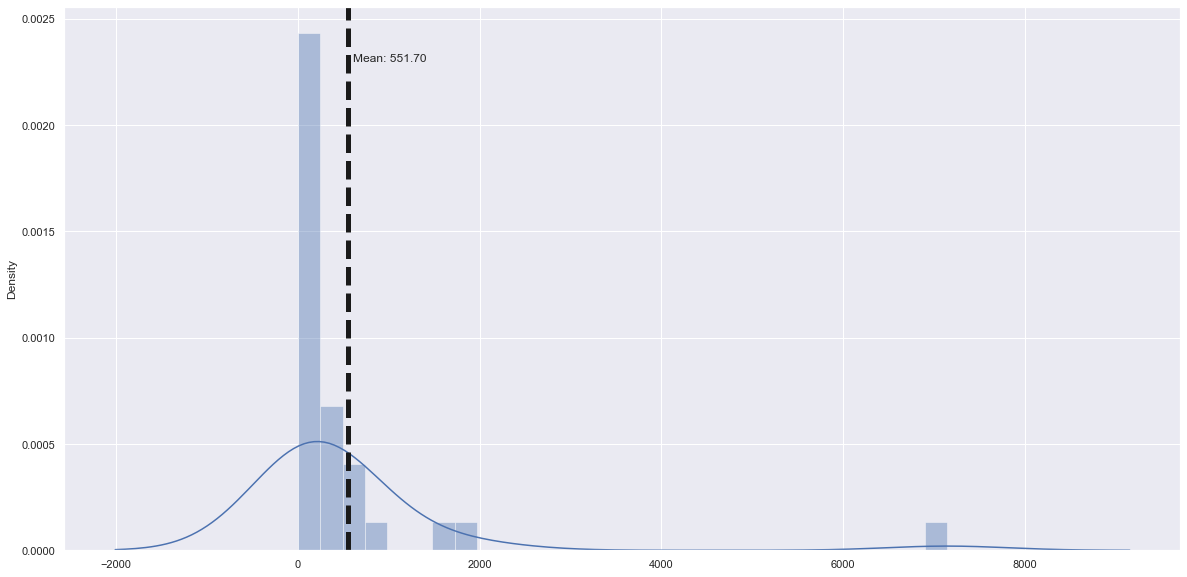

In [11]:
# Sampling and plotting
sample_size = 30
women_sampled = np.random.choice(suicide_women, sample_size)
men_sampled = np.random.choice(suicide_men, sample_size)

plot_distribution(men_sampled)

plt.show()

## Boxplots

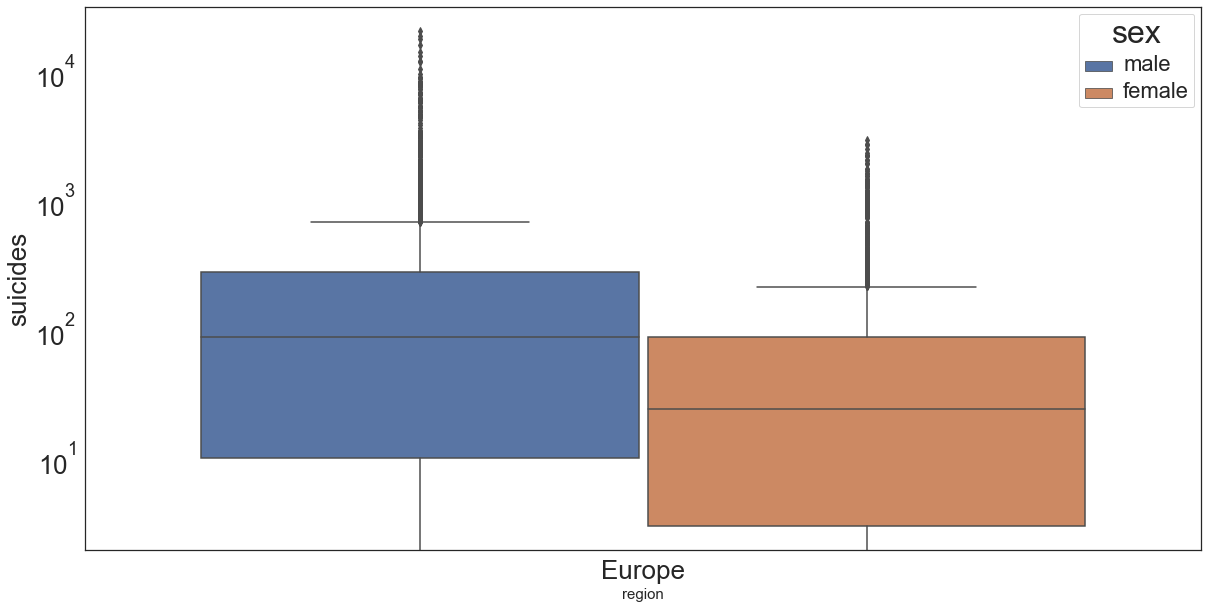

In [12]:
sns.set_theme(style="ticks", font_scale=1.25)
sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale('log')
sns.color_palette('PuOr_r')
ax = sns.boxplot(x = df_suicide_europe['region'] , y = df_suicide_europe['suicides_no']
                 , hue = df_suicide_europe['sex'])

ax.tick_params(axis = 'both', which = 'major', labelsize = 26) 
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.ylabel('suicides', fontsize = 26)

plt.savefig('plot2.png')
plt.show()

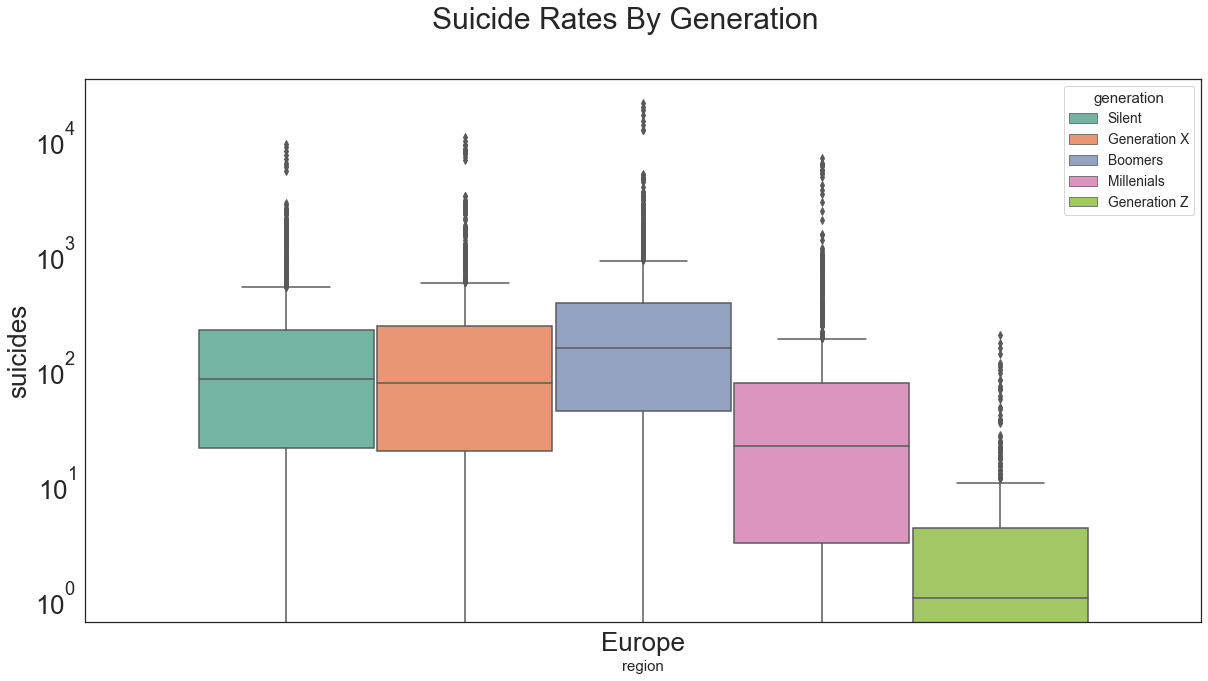

In [13]:
sns.set_theme(style="ticks", font_scale=1.25)
sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale('log')
sns.color_palette('pastel')
sns.set_palette('Set2', 8)

ax = sns.boxplot(x = df_suicide_europe['region'] , y = df_suicide_europe['suicides_no']
                 , hue = df_suicide_europe['generation'])

ax.tick_params(axis = 'both', which = 'major', labelsize = 26) 
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)

plt.ylabel('suicides', fontsize = 26)
plt.suptitle('Suicide Rates By Generation', fontsize = 30)
plt.show()

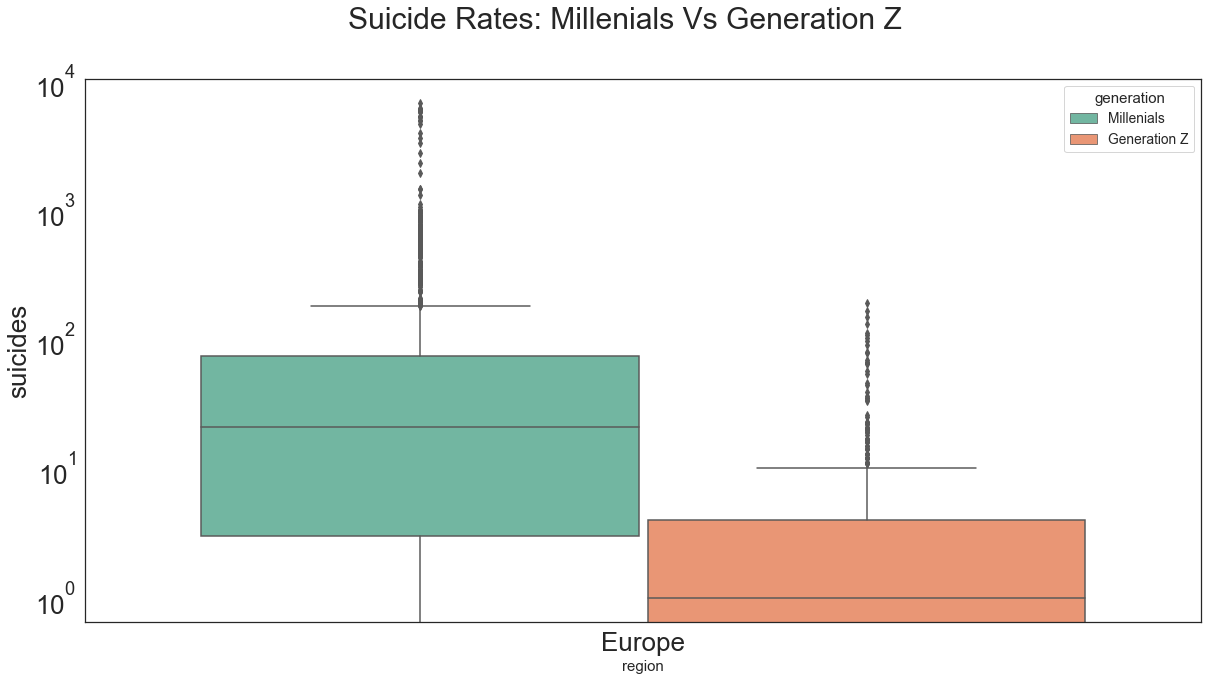

In [14]:
df_generation = df_suicide_europe[df_suicide_europe.generation.isin(['Millenials','Generation Z'])]

sns.set_theme(style="ticks", font_scale=1.25)
sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale('log')
sns.color_palette('pastel')
sns.set_palette('Set2', 8)

ax = sns.boxplot(x = df_generation['region'] , y = df_generation['suicides_no']
                 , hue = df_generation['generation'])
ax.tick_params(axis = 'both', which = 'major', labelsize = 26) 
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
plt.ylabel('suicides', fontsize = 26)

plt.suptitle('Suicide Rates: Millenials Vs Generation Z', fontsize = 30)
plt.show()

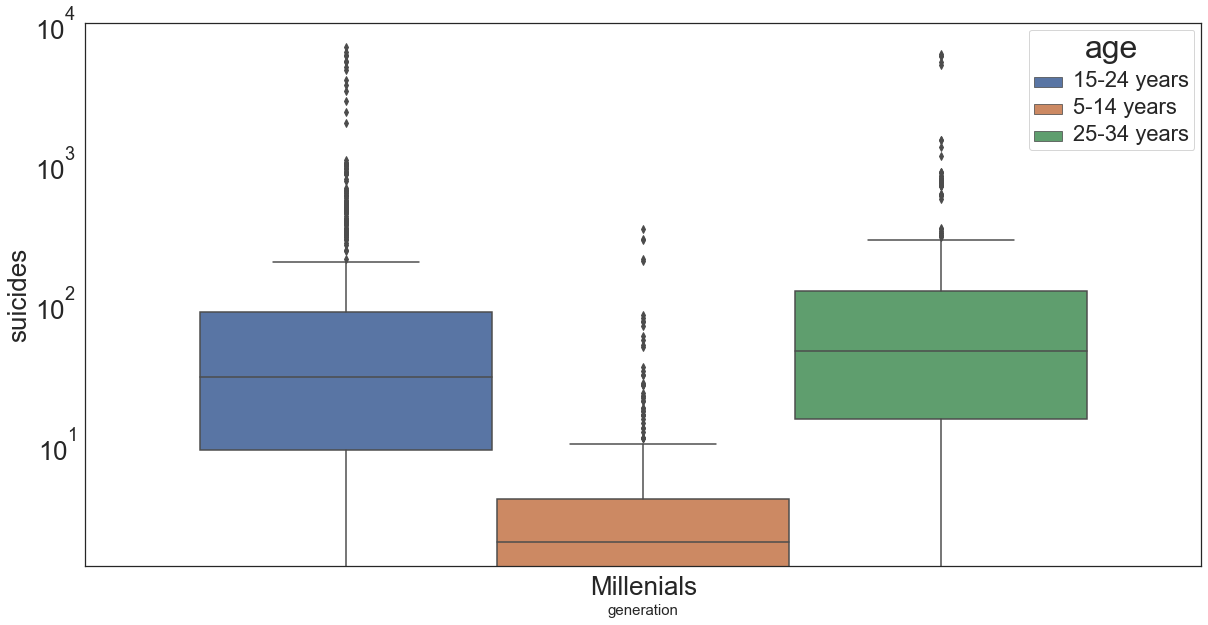

In [15]:
sns.set_theme(style="ticks", font_scale=1.25)
sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale('log')
sns.color_palette('RdYlGn_r')


ax = sns.boxplot(x = df_millenials['generation'] , y = df_millenials['suicides_no']
                 , hue = df_millenials['age'])

ax.tick_params(axis = 'both', which = 'major', labelsize = 26) 
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32')

plt.ylabel('suicides', fontsize = 26)

plt.savefig('plot3.png')
plt.show()